# FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

## Part 1: Data Preparation and Exploration

## Data Loading:

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore", category=UserWarning)
from statsmodels.tools.sm_exceptions import ValueWarning

# Suppress the specific ValueWarning
warnings.simplefilter('ignore', ValueWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import files

# Upload files
uploaded = files.upload()
df = pd.read_csv('exchange_rate.csv')

Saving exchange_rate.csv to exchange_rate (3).csv


In [4]:
df


,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [5]:
df.index.freq = 'MS'
df.index

RangeIndex(start=0, stop=7588, step=1)

In [6]:
df = pd.read_csv('exchange_rate.csv',index_col='date',parse_dates=True)
df

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197


In [7]:
import pandas as pd

# Ensure Pandas correctly interprets the date format
df.index = pd.to_datetime(df.index, format="%d-%m-%Y %H:%M", dayfirst=True)


In [8]:
df.index = pd.to_datetime(df.index)

In [9]:
df

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB


## Data Preprocessing

In [11]:
#df.dropna(inplace=True)
df.fillna(method='ffill', inplace=True)

### Visualize the data

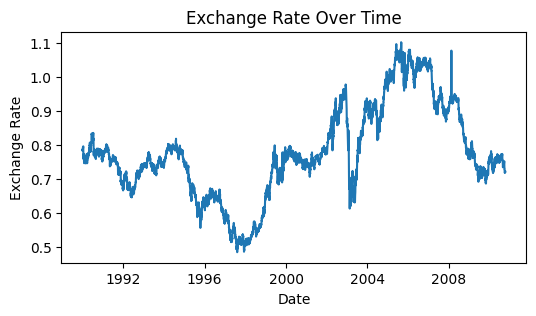

In [12]:
plt.figure(figsize=(6, 3))

# Set the title and axis labels
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')

# Plot the data
plt.plot(df)

# Display the plot
plt.show()


## Initial Exploration:

In [13]:
from statsmodels.tsa.seasonal import STL

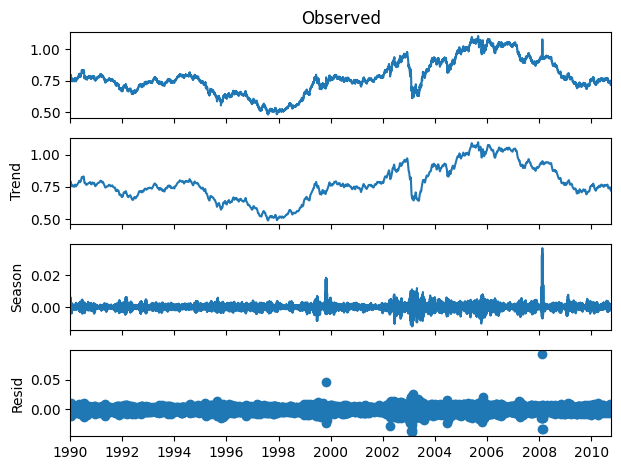

In [14]:
res = STL(df).fit()
res.plot()
plt.show()

## Part 2: Model Building - ARIMA

### Test for stationarity

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
def adf_test(data):
    if adfuller(data)[1] > 0.05:
        print('Data is not Stationary')
    else:
        print('Data is stationary')

In [17]:
adf_test(df)

Data is not Stationary


### Perform first order differencing

In [18]:
from statsmodels.tsa.statespace.tools import diff

In [19]:
diff_1 = diff(df, k_diff=1)

In [20]:
adf_test(diff_1)

Data is stationary


## Parameter Selection for ARIMA

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

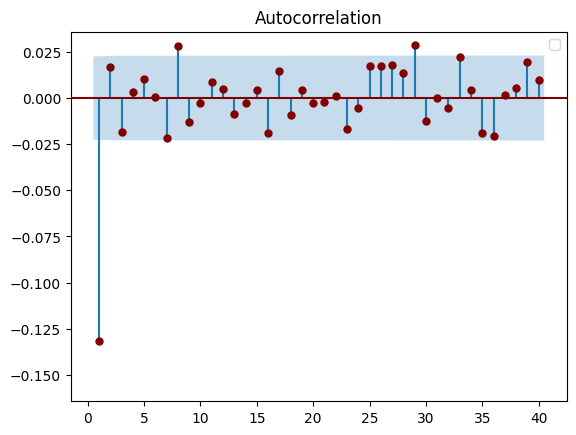

In [22]:
plot_acf(diff_1, lags=40, zero=False,
         color="maroon",
         title='Autocorrelation',
         auto_ylims=True,
        )
plt.legend()
plt.show()

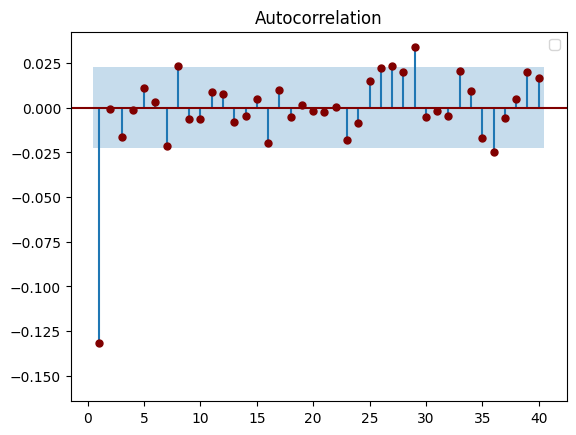

In [23]:
plot_pacf(diff_1, lags=40, zero=False,
         color="maroon",
         title='Autocorrelation',
         auto_ylims=True,
        )
plt.legend()
plt.show()

## Find the right order

In [24]:
! pip install pmdarima


In [25]:
from pmdarima import auto_arima
from pmdarima.model_selection import train_test_split

In [26]:
#train_data = df.iloc[:6010]
#test_data = df.iloc[6010:]
import pandas as pd

# Assuming 'df' is your DataFrame
train_size = int(len(df) * 0.80)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]


In [27]:
train_data.shape, test_data.shape

((6070, 1), (1518, 1))

In [28]:
auto_model = auto_arima(y=train_data, c=0, start_q=0, max_p=5,
                           max_q=5,  trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-45425.953, Time=2.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-45404.538, Time=1.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-45424.276, Time=1.71 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-45423.258, Time=7.70 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-45406.255, Time=0.59 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-45430.006, Time=11.84 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-45428.403, Time=9.71 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-45427.912, Time=6.62 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-45398.539, Time=2.44 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-45426.433, Time=2.29 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-45431.682, Time=5.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-45427.648, Time=0.63 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=-45430.083, Time=1.39 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-45429.587, Time=1.28 sec
 ARI

In [29]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6070
Model:               SARIMAX(3, 1, 0)   Log Likelihood               22719.841
Date:                Tue, 18 Feb 2025   AIC                         -45431.682
Time:                        16:44:17   BIC                         -45404.838
Sample:                    01-01-1990   HQIC                        -45422.365
                         - 08-14-2006                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0574      0.005    -11.248      0.000      -0.067      -0.047
ar.L2          0.0228      0.007      3.417      0.001       0.010       0.036
ar.L3         -0.0315      0.007     -4.661      0.000      -0.045      -0.018
sigma2       3.28e-05   1.97e-07    166.489      0.000    3.24e-05    3.32e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            101189.32
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               3.84   Skew:                            -0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
auto_model.order

(3, 1, 0)

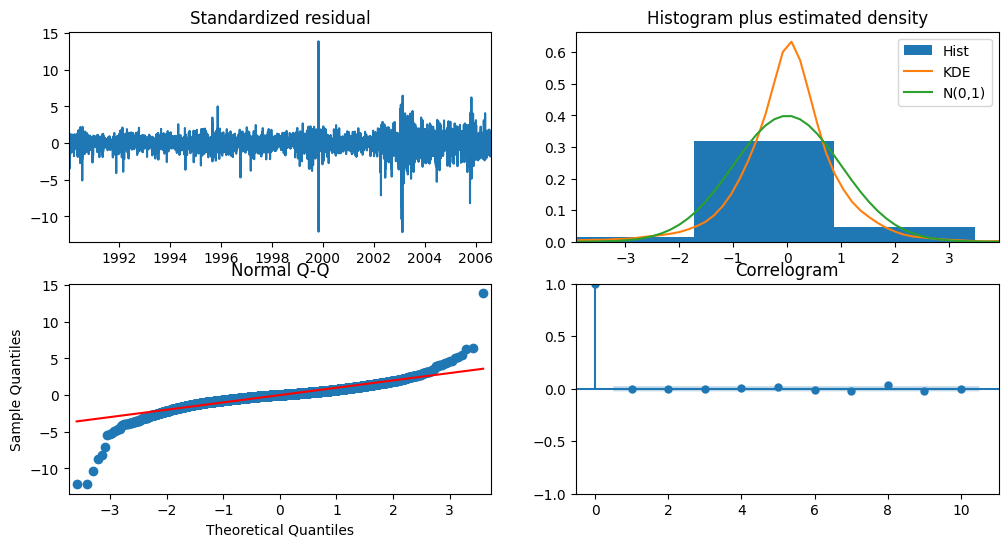

In [31]:
auto_model.plot_diagnostics(figsize=(12,6));

## Model Fitting

In [32]:
# Creating Final ARIMA model
from statsmodels.tsa.arima.model import ARIMA
final_model = ARIMA(train_data,
                    order=auto_model.order)
final_output = final_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [33]:
start = len(train_data)
end = len(df)-1
start,end

(6070, 7587)

In [34]:
forecast_arima = final_output.predict(start = start, end=end)

In [35]:
forecast_arima

,predicted_mean
2006-08-15,1.023732
2006-08-16,1.023692
2006-08-17,1.023694
2006-08-18,1.023687
2006-08-19,1.023689
...,...
2010-10-06,1.023689
2010-10-07,1.023689
2010-10-08,1.023689
2010-10-09,1.023689


## Forecasting:

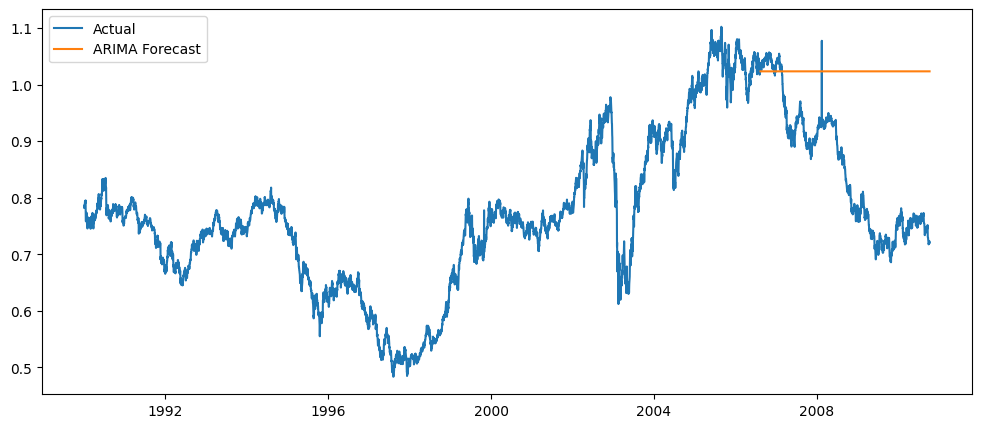

<Figure size 600x300 with 0 Axes>

<Figure size 600x300 with 0 Axes>

In [36]:
plt.figure(figsize=(12,5))
plt.plot(df, label="Actual")
plt.plot(forecast_arima, label="ARIMA Forecast")
plt.legend()
plt.show()

plt.figure(figsize=(6, 3))


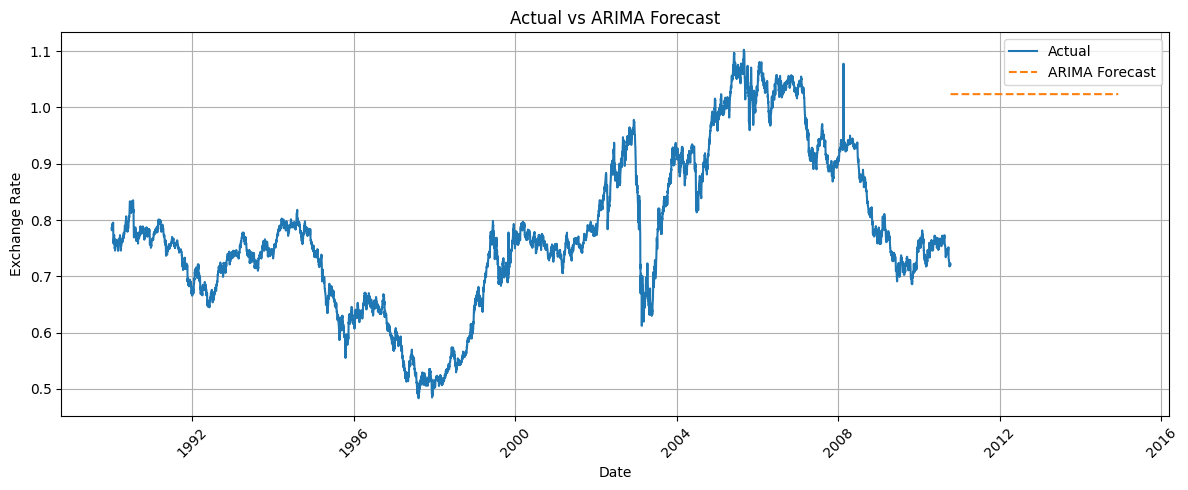

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your original DataFrame with actual data
# and 'forecast' is a Pandas Series with the forecasted values

# Create a new DataFrame to combine actual data and forecasted data
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=len(forecast_arima), freq='D')
forecast_df = pd.DataFrame(forecast_arima.values, index=forecast_index, columns=['Forecast'])

# Concatenate the actual data and forecasted data
combined_df = pd.concat([df, forecast_df])

# Plot the actual data and forecasted data
plt.figure(figsize=(12, 5))
plt.plot(combined_df.index, combined_df['Ex_rate'], label="Actual")
plt.plot(forecast_df.index, forecast_df['Forecast'], label="ARIMA Forecast", linestyle='--')
plt.legend()
plt.title('Actual vs ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Part 3: Model Building - Exponential Smoothing

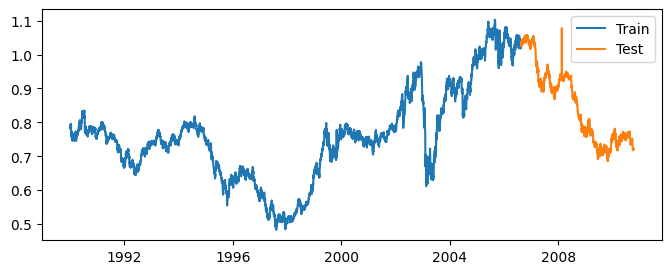

In [39]:
plt.figure(figsize=(8,3))
plt.plot(train_data['Ex_rate'], label='Train')
plt.plot(test_data['Ex_rate'], label='Test')
plt.legend()
plt.show()

In [40]:
print(train_data.isnull().sum())  # Should print 0 NaNs

Ex_rate    0
dtype: int64


## Parameter Optimization:

#### Optimizing the smoothing parameters—α (level), β (trend), and γ (seasonality)—is crucial for accurate forecasts. statsmodels provides the ExponentialSmoothing class, which can automatically estimate these parameters by minimizing the sum of squared errors.


In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the model with automatic parameter optimization
model = ExponentialSmoothing(train_data['Ex_rate'], trend='add', seasonal='add', seasonal_periods=365)
fitted_model = model.fit()

# Access optimized parameters
optimized_params = fitted_model.params
print(optimized_params)

{'smoothing_level': 0.9997521488754495, 'smoothing_trend': 1.836888766264484e-05, 'smoothing_seasonal': 0.00023877099168205694, 'damping_trend': nan, 'initial_level': 0.7855720000231424, 'initial_trend': 3.930477981374671e-05, 'initial_seasons': array([ 7.25701948e-04,  2.17851471e-03, -8.38000971e-04,  1.37238469e-04,
        6.03076828e-04,  1.20371726e-03,  1.03655706e-03,  2.78251487e-03,
        2.30430869e-03,  4.45766482e-03,  5.30914056e-03,  6.00727327e-03,
        6.56953891e-03,  8.34638209e-03,  6.36415726e-03,  6.51632895e-03,
        6.14596695e-03,  4.78600079e-03,  6.53754786e-03,  6.79648053e-03,
        7.55990363e-03,  8.12019484e-03,  6.89979354e-03,  6.13588687e-03,
        4.88686769e-03,  4.92553327e-03,  7.07115538e-03,  7.34663178e-03,
        6.48253065e-03,  8.30031491e-03,  8.69506943e-03,  9.69444303e-03,
        9.70070874e-03,  9.99041462e-03,  1.13313517e-02,  1.11171647e-02,
        9.72830003e-03,  6.99370086e-03,  6.37400221e-03,  3.12594818e-03,
    

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


## Model Fitting and Forecasting:

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [43]:
params = {
    'smoothing_level': 0.9999999850988369,
    'smoothing_trend': 6.233678269992594e-16,
    'smoothing_seasonal': 3.5220588639564702e-09,
    'damping_trend': None,  # 'nan' is not valid; use None instead
    'initial_level': 0.7860135203305948,
    'initial_trend': 3.948338332418973e-05,
    'initial_seasons': np.array([-0.00072195, -0.00052651, -0.00051235, -0.00031533, -0.00044022,
                                 -0.00059337, -0.00090663, -0.00065766, -0.00121406, -0.00062897,
                                 -0.00055014, -0.00080973]),
    'use_boxcox': False,
    'remove_bias': False
}


In [44]:
model = ExponentialSmoothing(
    train_data['Ex_rate'],
    trend='add',
    seasonal='add',
    seasonal_periods=12,
    initialization_method='known',
    initial_level=params['initial_level'],
    initial_trend=params['initial_trend'],
    initial_seasonal=params['initial_seasons'],
    use_boxcox=params['use_boxcox']
)

In [45]:
fitted_model = model.fit(
    smoothing_level=params['smoothing_level'],
    smoothing_trend=params['smoothing_trend'],
    smoothing_seasonal=params['smoothing_seasonal'],
    damping_trend=params['damping_trend'],
    optimized=False,
    remove_bias=params['remove_bias']
)

In [46]:
forecast_steps = len(test_data)
forecast_exp = fitted_model.forecast(steps=forecast_steps)

# Ensure the forecast index aligns with the test data index
forecast_exp = pd.Series(forecast_exp.values, index=test_data.index)

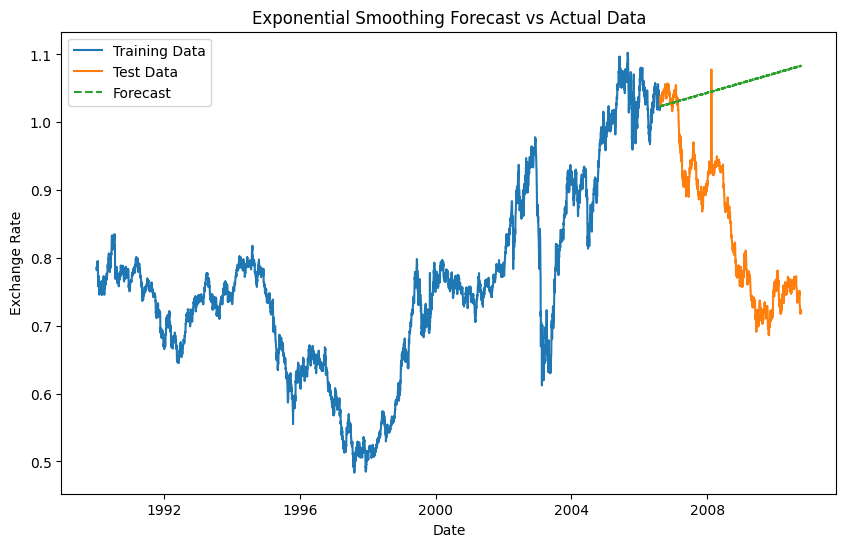

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Ex_rate'], label='Training Data')
plt.plot(test_data.index, test_data['Ex_rate'], label='Test Data')
plt.plot(forecast_exp.index, forecast_exp, label='Forecast', linestyle='--')
plt.legend()
plt.title('Exponential Smoothing Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

In [48]:
forecast_exp

,0
date,
2006-08-15,1.023670
2006-08-16,1.023450
2006-08-17,1.023577
2006-08-18,1.023812
2006-08-19,1.023866
...,...
2010-10-06,1.083149
2010-10-07,1.083276
2010-10-08,1.083511


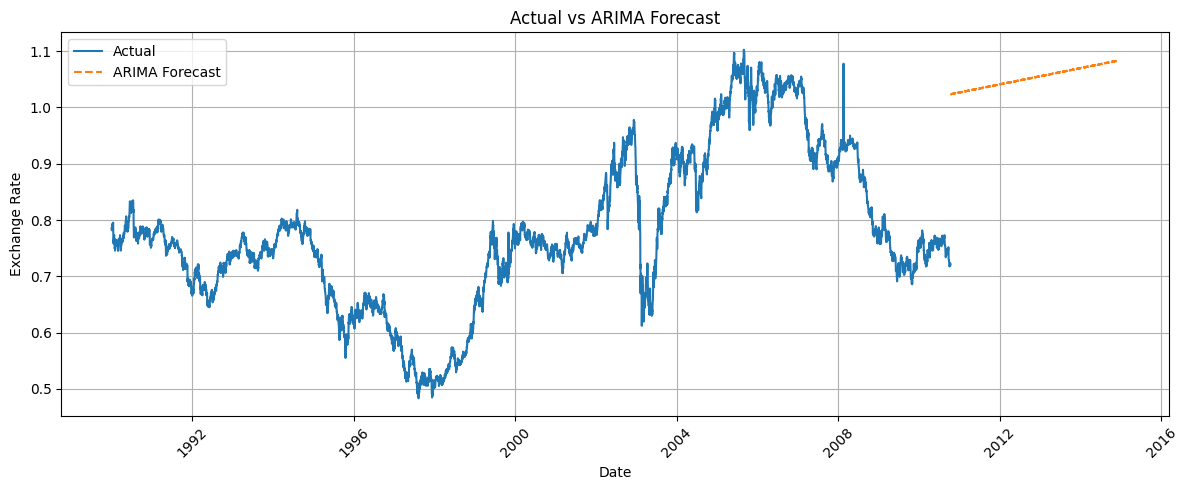

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your original DataFrame with actual data
# and 'forecast' is a Pandas Series with the forecasted values

# Create a new DataFrame to combine actual data and forecasted data
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=len(forecast_exp), freq='D')
forecast_df = pd.DataFrame(forecast_exp.values, index=forecast_index, columns=['Forecast'])

# Concatenate the actual data and forecasted data
combined_df = pd.concat([df, forecast_df])

# Plot the actual data and forecasted data
plt.figure(figsize=(12, 5))
plt.plot(combined_df.index, combined_df['Ex_rate'], label="Actual")
plt.plot(forecast_df.index, forecast_df['Forecast'], label="ARIMA Forecast", linestyle='--')
plt.legend()
plt.title('Actual vs ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Part 4: Evaluation and Comparison

## Compute Error Metrics:

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate error metrics for ARIMA and Exponential Smoothing forecasts
mae_arima = mean_absolute_error(test_data['Ex_rate'], forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(test_data['Ex_rate'], forecast_arima))
mape_arima = np.mean(np.abs((test_data['Ex_rate'] - forecast_arima) / test_data['Ex_rate'])) * 100

mae_exp = mean_absolute_error(test_data['Ex_rate'], forecast_exp)
rmse_exp = np.sqrt(mean_squared_error(test_data['Ex_rate'], forecast_exp))
mape_exp = np.mean(np.abs((test_data['Ex_rate'] - forecast_exp) / test_data['Ex_rate'])) * 100

print(f"ARIMA MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}")
print(f"Exponential Smoothing MAE: {mae_exp}, RMSE: {rmse_exp}, MAPE: {mape_exp}")


ARIMA MAE: 0.17774979136682473, RMSE: 0.2054816477708252, MAPE: 22.803066504313342
Exponential Smoothing MAE: 0.20675470686065262, RMSE: 0.2392893084295349, MAPE: 26.52900993167836


## 	Model Comparison:

### ARIMA Model:

#### Performance: Lower MAE (0.1777), RMSE (0.2055), and MAPE (22.80%) compared to Exponential Smoothing.
#### Advantages: Effectively captures complex patterns like trends and seasonality.
#### Limitations: Requires stationary data; parameter selection can be challenging.

### Exponential Smoothing Model:

#### Performance: Higher MAE (0.2068), RMSE (0.2393), and MAPE (26.53%) than ARIMA.
#### Advantages: Simple to implement; suitable for short-term forecasts with minimal trend or seasonality.
#### Limitations: Less effective with complex data patterns; limited flexibility.

## Conclusion:

#### The ARIMA model demonstrates superior forecasting accuracy for exchange rates in this dataset, as evidenced by its lower MAE, RMSE, and MAPE values compared to the Exponential Smoothing model. This indicates that ARIMA provides more precise predictions, making it the preferred choice for this analysis.